In [1]:
import findspark
findspark.init('/home/ubuntu/spark-3.2.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('read_data').getOrCreate()

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/05/23 11:43:25 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
24/05/23 11:43:27 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In [2]:
# Read the data
df = spark.read.csv('global_education_data.csv', inferSchema=True, header=True)
row_count = df.count()
column_count = len(df.columns)
print(f"{row_count} rows, {column_count} columns")

201 rows, 29 columns


In [3]:
# The first 15 lines of output data
columns = df.columns
num_columns_per_output = 3
num_iterations = (len(columns) + num_columns_per_output - 1) // num_columns_per_output

for i in range(num_iterations):
    start_idx = i * num_columns_per_output
    end_idx = min((i + 1) * num_columns_per_output, len(columns))
    selected_columns = columns[start_idx:end_idx]
    
    print(f"Displaying columns: {selected_columns}")
    df.select(selected_columns).show(15, truncate=False)

Displaying columns: ['Countries and areas', 'Latitude ', 'Longitude']
+-------------------+---------+----------+
|Countries and areas|Latitude |Longitude |
+-------------------+---------+----------+
|Afghanistan        |33.93911 |67.709953 |
|Albania            |41.153332|20.168331 |
|Algeria            |28.033886|1.659626  |
|Andorra            |42.506285|1.521801  |
|Angola             |11.202692|17.873887 |
|Anguilla           |18.220554|63.068615 |
|Antigua and Barbuda|17.060816|61.796428 |
|Argentina          |38.416097|63.616672 |
|Armenia            |40.069099|45.038189 |
|Australia          |25.274398|133.775136|
|Austria            |47.516231|14.550072 |
|Azerbaijan         |40.143105|47.576927 |
|The Bahamas        |25.03428 |77.39628  |
|Bahrain            |26.0667  |50.5577   |
|Bangladesh         |23.684994|90.356331 |
+-------------------+---------+----------+
only showing top 15 rows

Displaying columns: ['OOSR_Pre0Primary_Age_Male', 'OOSR_Pre0Primary_Age_Female', 'OOSR_

+------------------------------------+--------------------------------------+-----------------------------+
|Completion_Rate_Upper_Secondary_Male|Completion_Rate_Upper_Secondary_Female|Grade_2_3_Proficiency_Reading|
+------------------------------------+--------------------------------------+-----------------------------+
|32                                  |14                                    |22                           |
|76                                  |80                                    |0                            |
|22                                  |37                                    |0                            |
|0                                   |0                                     |0                            |
|24                                  |15                                    |0                            |
|0                                   |0                                     |0                            |
|0                          

In [4]:
df.printSchema()

root
 |-- Countries and areas: string (nullable = true)
 |-- Latitude : double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- OOSR_Pre0Primary_Age_Male: integer (nullable = true)
 |-- OOSR_Pre0Primary_Age_Female: integer (nullable = true)
 |-- OOSR_Primary_Age_Male: integer (nullable = true)
 |-- OOSR_Primary_Age_Female: integer (nullable = true)
 |-- OOSR_Lower_Secondary_Age_Male: integer (nullable = true)
 |-- OOSR_Lower_Secondary_Age_Female: integer (nullable = true)
 |-- OOSR_Upper_Secondary_Age_Male: integer (nullable = true)
 |-- OOSR_Upper_Secondary_Age_Female: integer (nullable = true)
 |-- Completion_Rate_Primary_Male: integer (nullable = true)
 |-- Completion_Rate_Primary_Female: integer (nullable = true)
 |-- Completion_Rate_Lower_Secondary_Male: integer (nullable = true)
 |-- Completion_Rate_Lower_Secondary_Female: integer (nullable = true)
 |-- Completion_Rate_Upper_Secondary_Male: integer (nullable = true)
 |-- Completion_Rate_Upper_Secondary_Female: inte

In [6]:
# Check if there are any null values in the data
from pyspark.sql import functions as f

total_null_count = df.select([f.sum(f.when(f.isnull(c), 1).otherwise(0)).alias(c) for c in df.columns]).collect()[0]
print(f"The total number of empty values in the data: {sum(total_null_count)}")

24/05/19 13:48:37 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


The total number of empty values in the data: 0


In [7]:
columns = df.columns
num_columns_per_output = 3
num_iterations = (len(columns) + num_columns_per_output - 1) // num_columns_per_output

for i in range(num_iterations):
    start_idx = i * num_columns_per_output
    end_idx = min((i + 1) * num_columns_per_output, len(columns))
    selected_columns = columns[start_idx:end_idx]
    
    print(f"Displaying columns: {selected_columns}")
    df.select(selected_columns).describe().show(truncate=False)

Displaying columns: ['Countries and areas', 'Latitude ', 'Longitude']
+-------+-------------------+------------------+-----------------+
|summary|Countries and areas|Latitude          |Longitude        |
+-------+-------------------+------------------+-----------------+
|count  |201                |201               |201              |
|mean   |null               |25.205278234825844|55.40848957363182|
|stddev |null               |16.762986521651907|45.96239841621884|
|min    |Afghanistan        |0.023559          |0.824782         |
|max    |Zimbabwe           |64.963051         |178.065032       |
+-------+-------------------+------------------+-----------------+

Displaying columns: ['OOSR_Pre0Primary_Age_Male', 'OOSR_Pre0Primary_Age_Female', 'OOSR_Primary_Age_Male']
+-------+-------------------------+---------------------------+---------------------+
|summary|OOSR_Pre0Primary_Age_Male|OOSR_Pre0Primary_Age_Female|OOSR_Primary_Age_Male|
+-------+-------------------------+-------------

+-------+--------------------------------+------------------+----------------------------------+
|summary|Youth_15_24_Literacy_Rate_Female|Birth_Rate        |Gross_Primary_Education_Enrollment|
+-------+--------------------------------+------------------+----------------------------------+
|count  |201                             |201               |201                               |
|mean   |34.77114427860697               |18.851194029850742|94.88358208955226                 |
|stddev |45.14285506239145               |10.818260977031576|29.831829965734208                |
|min    |0                               |0.0               |0.0                               |
|max    |100                             |46.08             |142.5                             |
+-------+--------------------------------+------------------+----------------------------------+

Displaying columns: ['Gross_Tertiary_Education_Enrollment', 'Unemployment_Rate']
+-------+-----------------------------------+

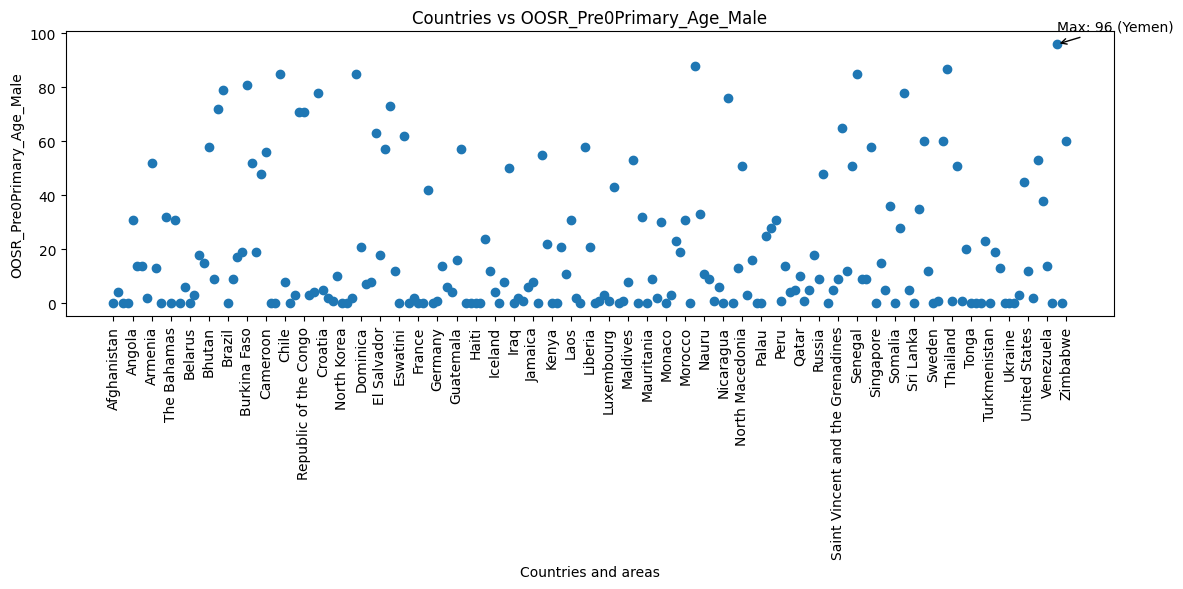

In [24]:
# Countries vs OOSR_Pre0Primary_Age_Male

countries = df.select("Countries and areas").rdd.flatMap(lambda x: x).collect()
oosr_values = df.select("OOSR_Pre0Primary_Age_Male").rdd.flatMap(lambda x: x).collect()

max_value = np.max(oosr_values)
max_index = np.argmax(oosr_values)
max_country = countries[max_index]

plt.figure(figsize=(12, 6), dpi=100)
plt.scatter(countries, oosr_values)
plt.title('Countries vs OOSR_Pre0Primary_Age_Male')
plt.xlabel('Countries and areas')
plt.ylabel('OOSR_Pre0Primary_Age_Male')

x_labels = countries[::4]
plt.xticks(ticks=range(0, len(countries), 4), labels=x_labels, rotation=90)

plt.annotate(f'Max: {max_value} ({max_country})', xy=(max_index, max_value), xytext=(max_index, max_value + 5),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.tight_layout()
plt.show()


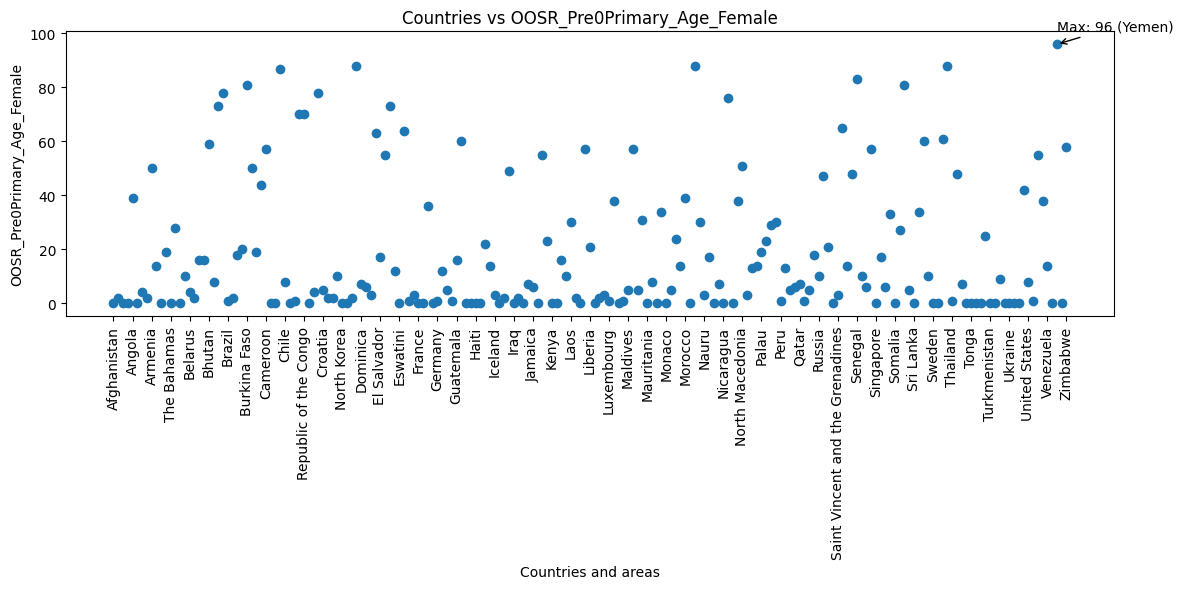

In [25]:
# Countries vs OOSR_Pre0Primary_Age_Female
countries = df.select("Countries and areas").rdd.flatMap(lambda x: x).collect()
oosr_values = df.select("OOSR_Pre0Primary_Age_Female").rdd.flatMap(lambda x: x).collect()

max_value = np.max(oosr_values)
max_index = np.argmax(oosr_values)
max_country = countries[max_index]

plt.figure(figsize=(12, 6), dpi=100)
plt.scatter(countries, oosr_values)
plt.title('Countries vs OOSR_Pre0Primary_Age_Female')
plt.xlabel('Countries and areas')
plt.ylabel('OOSR_Pre0Primary_Age_Female')

x_labels = countries[::4]
plt.xticks(ticks=range(0, len(countries), 4), labels=x_labels, rotation=90)

plt.annotate(f'Max: {max_value} ({max_country})', xy=(max_index, max_value), xytext=(max_index, max_value + 5),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.tight_layout()
plt.show()

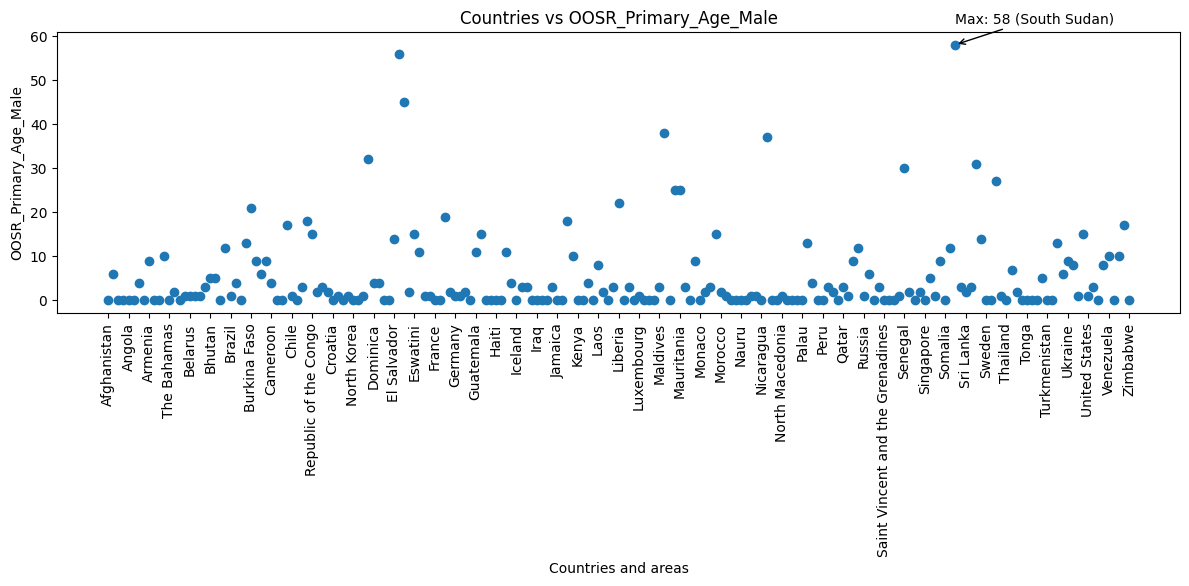

In [26]:
# Countries vs OOSR_Primary_Age_Male
countries = df.select("Countries and areas").rdd.flatMap(lambda x: x).collect()
oosr_values = df.select("OOSR_Primary_Age_Male").rdd.flatMap(lambda x: x).collect()

max_value = np.max(oosr_values)
max_index = np.argmax(oosr_values)
max_country = countries[max_index]

plt.figure(figsize=(12, 6), dpi=100)
plt.scatter(countries, oosr_values)
plt.title('Countries vs OOSR_Primary_Age_Male')
plt.xlabel('Countries and areas')
plt.ylabel('OOSR_Primary_Age_Male')

x_labels = countries[::4]
plt.xticks(ticks=range(0, len(countries), 4), labels=x_labels, rotation=90)

plt.annotate(f'Max: {max_value} ({max_country})', xy=(max_index, max_value), xytext=(max_index, max_value + 5),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.tight_layout()
plt.show()

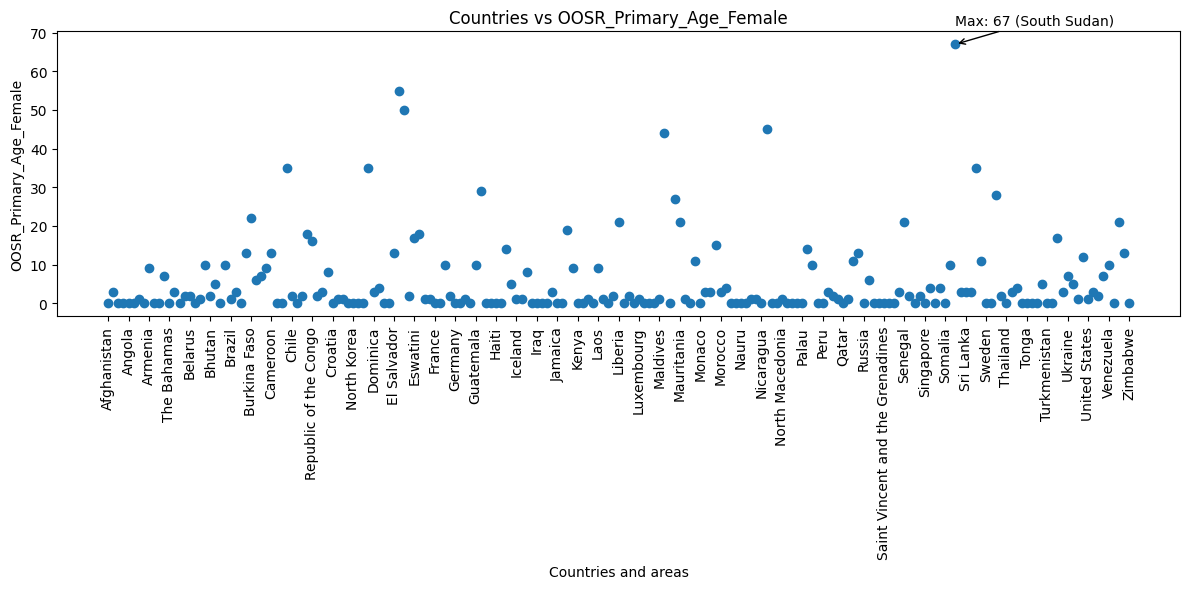

In [27]:
# Countries vs OOSR_Primary_Age_Female
countries = df.select("Countries and areas").rdd.flatMap(lambda x: x).collect()
oosr_values = df.select("OOSR_Primary_Age_Female").rdd.flatMap(lambda x: x).collect()

max_value = np.max(oosr_values)
max_index = np.argmax(oosr_values)
max_country = countries[max_index]

plt.figure(figsize=(12, 6), dpi=100)
plt.scatter(countries, oosr_values)
plt.title('Countries vs OOSR_Primary_Age_Female')
plt.xlabel('Countries and areas')
plt.ylabel('OOSR_Primary_Age_Female')

x_labels = countries[::4]
plt.xticks(ticks=range(0, len(countries), 4), labels=x_labels, rotation=90)

plt.annotate(f'Max: {max_value} ({max_country})', xy=(max_index, max_value), xytext=(max_index, max_value + 5),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.tight_layout()
plt.show()

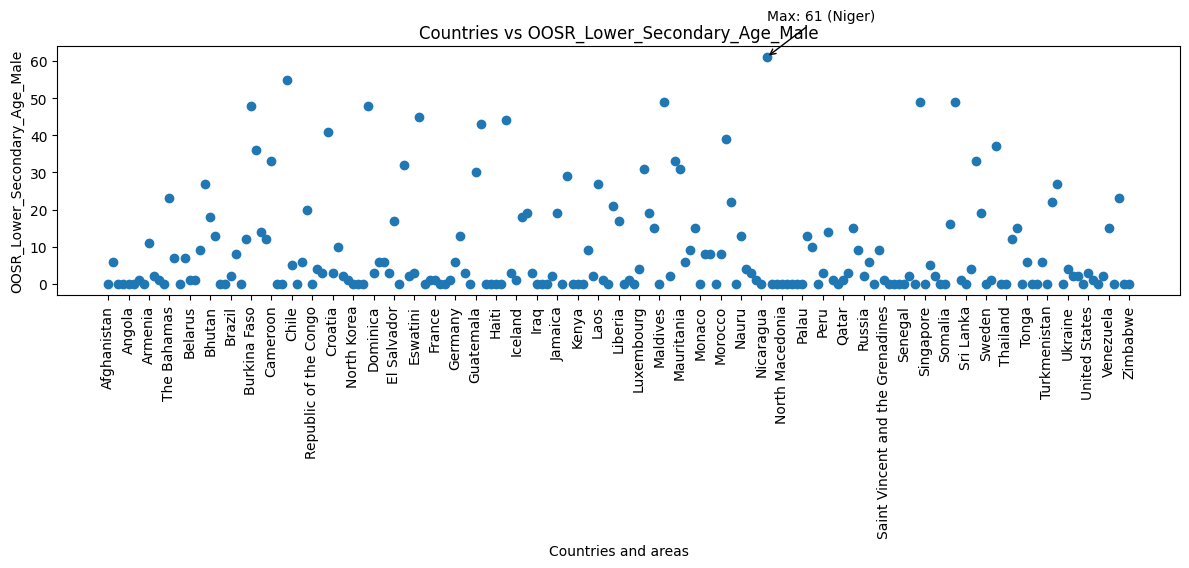

In [28]:
# Countries vs OOSR_Lower_Secondary_Age_Male
countries = df.select("Countries and areas").rdd.flatMap(lambda x: x).collect()
oosr_values = df.select("OOSR_Lower_Secondary_Age_Male").rdd.flatMap(lambda x: x).collect()

max_value = np.max(oosr_values)
max_index = np.argmax(oosr_values)
max_country = countries[max_index]

offset = 10

plt.figure(figsize=(12, 6), dpi=100)
plt.scatter(countries, oosr_values)
plt.title('Countries vs OOSR_Lower_Secondary_Age_Male')
plt.xlabel('Countries and areas')
plt.ylabel('OOSR_Lower_Secondary_Age_Male')

x_labels = countries[::4]
plt.xticks(ticks=range(0, len(countries), 4), labels=x_labels, rotation=90)

plt.annotate(f'Max: {max_value} ({max_country})', xy=(max_index, max_value), xytext=(max_index, max_value + offset),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.tight_layout()
plt.show()


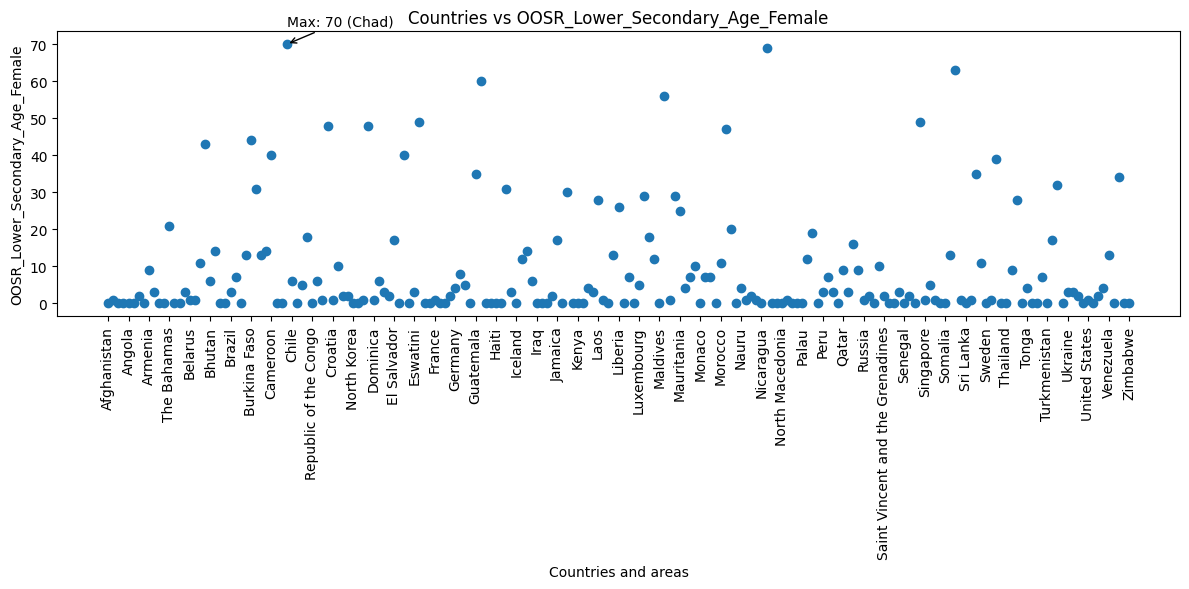

In [29]:
# Countries vs OOSR_Lower_Secondary_Age_Female
countries = df.select("Countries and areas").rdd.flatMap(lambda x: x).collect()
oosr_values = df.select("OOSR_Lower_Secondary_Age_Female").rdd.flatMap(lambda x: x).collect()

max_value = np.max(oosr_values)
max_index = np.argmax(oosr_values)
max_country = countries[max_index]

plt.figure(figsize=(12, 6), dpi=100)
plt.scatter(countries, oosr_values)
plt.title('Countries vs OOSR_Lower_Secondary_Age_Female')
plt.xlabel('Countries and areas')
plt.ylabel('OOSR_Lower_Secondary_Age_Female')

x_labels = countries[::4]
plt.xticks(ticks=range(0, len(countries), 4), labels=x_labels, rotation=90)

plt.annotate(f'Max: {max_value} ({max_country})', xy=(max_index, max_value), xytext=(max_index, max_value + 5),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.tight_layout()
plt.show()

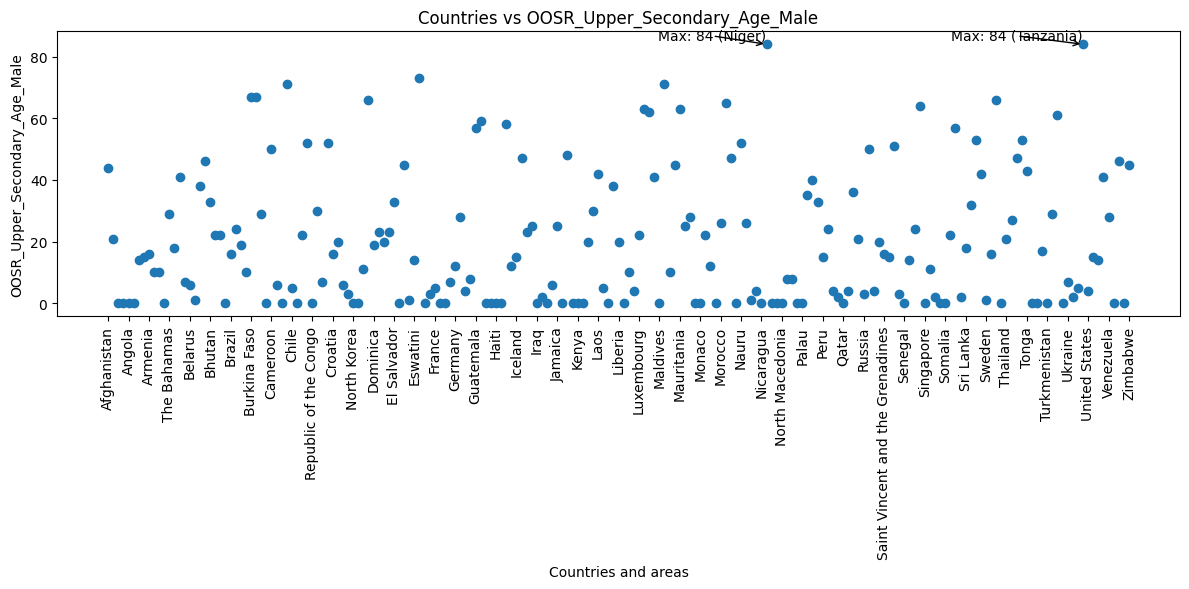

In [30]:
# Countries vs OOSR_Upper_Secondary_Age_Male
countries = df.select("Countries and areas").rdd.flatMap(lambda x: x).collect()
oosr_values = df.select("OOSR_Upper_Secondary_Age_Male").rdd.flatMap(lambda x: x).collect()

plt.figure(figsize=(12, 6), dpi=100)
plt.scatter(countries, oosr_values)
plt.title('Countries vs OOSR_Upper_Secondary_Age_Male')
plt.xlabel('Countries and areas')
plt.ylabel('OOSR_Upper_Secondary_Age_Male')

x_labels = countries[::4]
plt.xticks(ticks=range(0, len(countries), 4), labels=x_labels, rotation=90)

max_value = np.max(oosr_values)
max_indices = np.where(np.array(oosr_values) == max_value)[0]
max_countries = [countries[i] for i in max_indices]

for i, index in enumerate(max_indices):
    plt.annotate(f'Max: {max_value} ({max_countries[i]})', xy=(index, max_value), xytext=(index, max_value + 5),
                 arrowprops=dict(facecolor='black', arrowstyle='->'), horizontalalignment='right', verticalalignment='top')

plt.tight_layout()
plt.show()

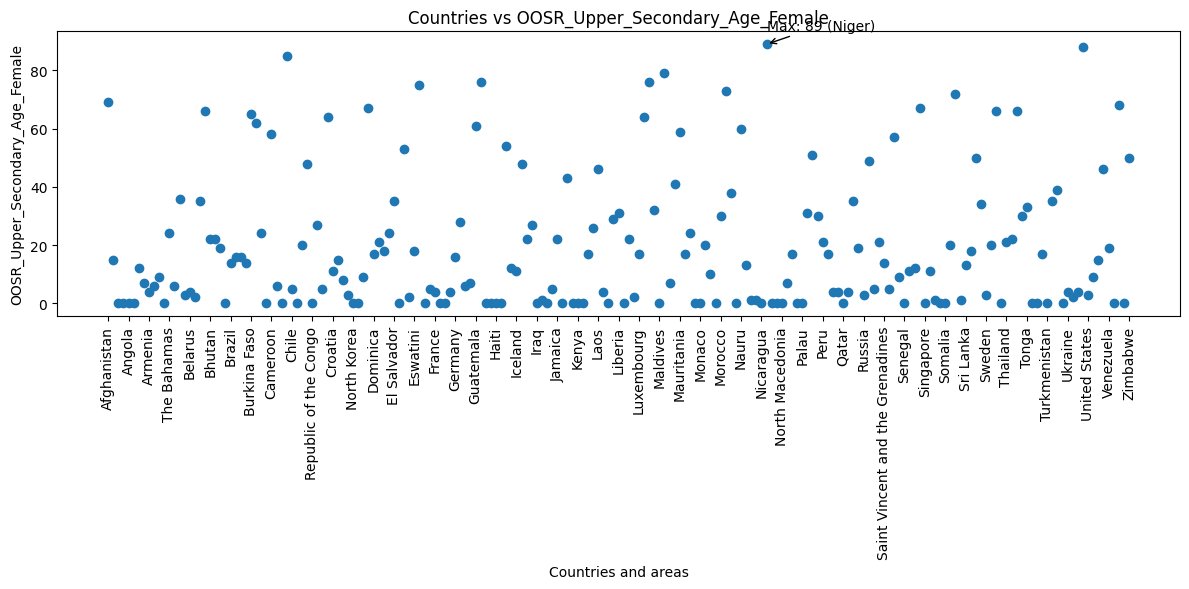

In [31]:
# Countries vs OOSR_Upper_Secondary_Age_Female
countries = df.select("Countries and areas").rdd.flatMap(lambda x: x).collect()
oosr_values = df.select("OOSR_Upper_Secondary_Age_Female").rdd.flatMap(lambda x: x).collect()

max_value = np.max(oosr_values)
max_index = np.argmax(oosr_values)
max_country = countries[max_index]

plt.figure(figsize=(12, 6), dpi=100)
plt.scatter(countries, oosr_values)
plt.title('Countries vs OOSR_Upper_Secondary_Age_Female')
plt.xlabel('Countries and areas')
plt.ylabel('OOSR_Upper_Secondary_Age_Female')

x_labels = countries[::4]
plt.xticks(ticks=range(0, len(countries), 4), labels=x_labels, rotation=90)

plt.annotate(f'Max: {max_value} ({max_country})', xy=(max_index, max_value), xytext=(max_index, max_value + 5),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.tight_layout()
plt.show()